In [24]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras

from matplotlib import pyplot as plt
%matplotlib inline
from keras.layers import Activation

In [25]:
df= pd.read_csv('UNI_df.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df1 = df.drop('time', axis=1)
df2 = df[['modularity','SplyFF','priceUSD','TxTfrValMeanUSD','TxTfrValUSD']]

# 1. MinMaxScalar Method

## 1.1 Preprocessing

In [26]:
#MinMaxScalar Preprocessing
df3 = df1['priceUSD']
data_set1 = df3.values
data_set1 = data_set1.astype('float32')
data_set1 = data_set1.reshape(-1, 1)
sc = MinMaxScaler(feature_range=(0, 1))
data_set1 = sc.fit_transform(data_set1)

In [11]:
data_set = df2.values
data_set = data_set.astype('float32')
mms = MinMaxScaler(feature_range=(0, 1))
data_set = mms.fit_transform(data_set)

In [12]:
#Train-Test Split
ratio = 0.9
train_size = int(len(data_set) * ratio)
test_size = len(data_set) - train_size
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

def create_dataset(data):
    window = 5
    label_index = 2
    x, y = [], []
    for i in range(len(data) - window):
        x.append(data[i:(i + window), :])
        y.append(data[i + window, label_index])
    return np.array(x), np.array(y)

train_x, train_y = create_dataset(train)
test_x, test_y = create_dataset(test)

## 1.2 Modelling

### a. Vanilla LSTM

In [13]:
#Vanilla LSTM 
model_vanillaLSTM = Sequential()
model_vanillaLSTM.add(LSTM(128,activation="sigmoid",input_shape=(train_x.shape[1], train_x.shape[2])))
model_vanillaLSTM.add(Dropout(0.2))
model_vanillaLSTM.add(Dense(1))
model_vanillaLSTM.compile(loss='mse', optimizer=keras.optimizers.Adam(lr = 0.1))
model_vanillaLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               68608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 68,737
Trainable params: 68,737
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Train with data
history_a = model_vanillaLSTM.fit(train_x, train_y, validation_data=(test_x, test_y),epochs=300, batch_size=64, verbose=2)

Epoch 1/300
3/3 - 1s - loss: 80.6305 - val_loss: 4.4452
Epoch 2/300
3/3 - 0s - loss: 2.9684 - val_loss: 5.3229
Epoch 3/300
3/3 - 0s - loss: 3.3045 - val_loss: 5.4925
Epoch 4/300
3/3 - 0s - loss: 2.9745 - val_loss: 3.9810
Epoch 5/300
3/3 - 0s - loss: 1.9855 - val_loss: 2.7344
Epoch 6/300
3/3 - 0s - loss: 1.1868 - val_loss: 1.8790
Epoch 7/300
3/3 - 0s - loss: 0.6933 - val_loss: 1.2523
Epoch 8/300
3/3 - 0s - loss: 0.3350 - val_loss: 0.6903
Epoch 9/300
3/3 - 0s - loss: 0.0974 - val_loss: 0.1865
Epoch 10/300
3/3 - 0s - loss: 0.0883 - val_loss: 0.0046
Epoch 11/300
3/3 - 0s - loss: 0.1510 - val_loss: 0.0146
Epoch 12/300
3/3 - 0s - loss: 0.0718 - val_loss: 0.0750
Epoch 13/300
3/3 - 0s - loss: 0.0339 - val_loss: 0.1242
Epoch 14/300
3/3 - 0s - loss: 0.0400 - val_loss: 0.1455
Epoch 15/300
3/3 - 0s - loss: 0.0376 - val_loss: 0.1350
Epoch 16/300
3/3 - 0s - loss: 0.0291 - val_loss: 0.1069
Epoch 17/300
3/3 - 0s - loss: 0.0257 - val_loss: 0.0744
Epoch 18/300
3/3 - 0s - loss: 0.0237 - val_loss: 0.0554


### b. Stacked LSTM

In [15]:
#Stacked: 
model_stacked = Sequential()
model_stacked.add(LSTM(50, activation='sigmoid', return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(50, activation='sigmoid'))
model_stacked.add(Dense(1))
model_stacked.compile(optimizer=keras.optimizers.Adam(lr = 0.1), loss='mse')
model_stacked.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 50)             11200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Train with data
history_b = model_stacked.fit(train_x, train_y, validation_data=(test_x, test_y),epochs=300, batch_size=64, verbose=2)

Epoch 1/300
3/3 - 1s - loss: 16.9536 - val_loss: 0.4000
Epoch 2/300
3/3 - 0s - loss: 0.6819 - val_loss: 1.4330
Epoch 3/300
3/3 - 0s - loss: 0.6101 - val_loss: 2.1258
Epoch 4/300
3/3 - 0s - loss: 0.8227 - val_loss: 1.9691
Epoch 5/300
3/3 - 0s - loss: 0.6554 - val_loss: 1.4445
Epoch 6/300
3/3 - 0s - loss: 0.3646 - val_loss: 0.7886
Epoch 7/300
3/3 - 0s - loss: 0.1385 - val_loss: 0.2103
Epoch 8/300
3/3 - 0s - loss: 0.1483 - val_loss: 0.1168
Epoch 9/300
3/3 - 0s - loss: 0.1426 - val_loss: 0.3951
Epoch 10/300
3/3 - 0s - loss: 0.1171 - val_loss: 0.5819
Epoch 11/300
3/3 - 0s - loss: 0.1250 - val_loss: 0.5064
Epoch 12/300
3/3 - 0s - loss: 0.0965 - val_loss: 0.3524
Epoch 13/300
3/3 - 0s - loss: 0.0860 - val_loss: 0.2240
Epoch 14/300
3/3 - 0s - loss: 0.0923 - val_loss: 0.2314
Epoch 15/300
3/3 - 0s - loss: 0.0746 - val_loss: 0.3283
Epoch 16/300
3/3 - 0s - loss: 0.0703 - val_loss: 0.3575
Epoch 17/300
3/3 - 0s - loss: 0.0699 - val_loss: 0.2821
Epoch 18/300
3/3 - 0s - loss: 0.0590 - val_loss: 0.1912


### c. Bidirectional LSTM (Best Performance)

In [17]:
#Bidirectional LSTM
from keras.layers import Dense, LSTM,Dropout, GRU, Bidirectional
model_biLSTM = Sequential()
model_biLSTM.add(Bidirectional(LSTM(100, activation='sigmoid'), input_shape=(train_x.shape[1], train_x.shape[2])))
#model.add(Dropout(0.2))
model_biLSTM.add(Dense(1))
model_biLSTM.compile(optimizer=keras.optimizers.Adam(lr = 0.1), loss='mse')
model_biLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               84800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 85,001
Trainable params: 85,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Train with data
history_c = model_biLSTM.fit(train_x, train_y, validation_data=(test_x, test_y),epochs=300, batch_size=64, verbose=2)

Epoch 1/300
3/3 - 2s - loss: 106.2655 - val_loss: 0.1398
Epoch 2/300
3/3 - 0s - loss: 0.9621 - val_loss: 3.6173
Epoch 3/300
3/3 - 0s - loss: 2.4247 - val_loss: 4.8725
Epoch 4/300
3/3 - 0s - loss: 2.8022 - val_loss: 3.7914
Epoch 5/300
3/3 - 0s - loss: 1.8837 - val_loss: 2.3765
Epoch 6/300
3/3 - 0s - loss: 0.9461 - val_loss: 0.8752
Epoch 7/300
3/3 - 0s - loss: 0.1908 - val_loss: 0.0474
Epoch 8/300
3/3 - 0s - loss: 0.3888 - val_loss: 0.0395
Epoch 9/300
3/3 - 0s - loss: 0.1798 - val_loss: 0.1051
Epoch 10/300
3/3 - 0s - loss: 0.0452 - val_loss: 0.0144
Epoch 11/300
3/3 - 0s - loss: 0.0994 - val_loss: 0.0333
Epoch 12/300
3/3 - 0s - loss: 0.0428 - val_loss: 0.1288
Epoch 13/300
3/3 - 0s - loss: 0.0280 - val_loss: 0.1966
Epoch 14/300
3/3 - 0s - loss: 0.0453 - val_loss: 0.1748
Epoch 15/300
3/3 - 0s - loss: 0.0331 - val_loss: 0.0978
Epoch 16/300
3/3 - 0s - loss: 0.0120 - val_loss: 0.0325
Epoch 17/300
3/3 - 0s - loss: 0.0122 - val_loss: 0.0143
Epoch 18/300
3/3 - 0s - loss: 0.0172 - val_loss: 0.0154

### d. GRU

In [19]:
from keras import optimizers
from keras.layers import Dense, Dropout,GRU

# GRU model
learning_rate = 0.1
hidden_unit = 100
batch_size=32
epoch = 200

# Architecture Gated Recurrent Unit
model_GRU = Sequential()
# First GRU layer with dropout
model_GRU.add(GRU(units=hidden_unit, return_sequences=False, input_shape=(train_x.shape[1], train_x.shape[2]), activation = 'sigmoid'))
#regressorGRU.add(Dropout(0.2))

# Output layer
model_GRU.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
model_GRU.compile(optimizer=optimizers.RMSprop(lr=learning_rate),loss='mean_squared_error')

model_GRU.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               32100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 32,201
Trainable params: 32,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Train with data
model_GRU.fit(train_x, train_y, validation_data=(test_x, test_y),epochs=epoch, batch_size=batch_size, verbose=2)

Epoch 1/200
6/6 - 1s - loss: 54.8916 - val_loss: 0.1637
Epoch 2/200
6/6 - 0s - loss: 0.0694 - val_loss: 0.3085
Epoch 3/200
6/6 - 0s - loss: 0.0630 - val_loss: 0.3414
Epoch 4/200
6/6 - 0s - loss: 0.0576 - val_loss: 0.3991
Epoch 5/200
6/6 - 0s - loss: 0.0614 - val_loss: 0.3276
Epoch 6/200
6/6 - 0s - loss: 0.7699 - val_loss: 10.9767
Epoch 7/200
6/6 - 0s - loss: 4.9562 - val_loss: 0.7585
Epoch 8/200
6/6 - 0s - loss: 0.0889 - val_loss: 0.6052
Epoch 9/200
6/6 - 0s - loss: 2.1843 - val_loss: 6.4062
Epoch 10/200
6/6 - 0s - loss: 1.0849 - val_loss: 0.3664
Epoch 11/200
6/6 - 0s - loss: 0.0574 - val_loss: 0.1757
Epoch 12/200
6/6 - 0s - loss: 0.1137 - val_loss: 0.9358
Epoch 13/200
6/6 - 0s - loss: 0.2538 - val_loss: 0.6420
Epoch 14/200
6/6 - 0s - loss: 0.1870 - val_loss: 0.6642
Epoch 15/200
6/6 - 0s - loss: 0.4429 - val_loss: 0.9002
Epoch 16/200
6/6 - 0s - loss: 0.0995 - val_loss: 0.0372
Epoch 17/200
6/6 - 0s - loss: 0.0428 - val_loss: 0.0363
Epoch 18/200
6/6 - 0s - loss: 0.2548 - val_loss: 0.0423

## 1.3 Evaluation

### a. Loss function

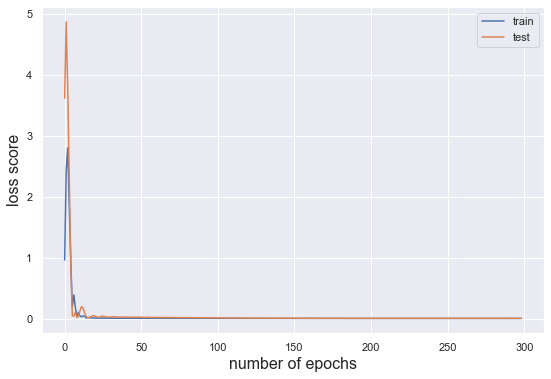

In [21]:
#Plot the loss score
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context("talk")
sns.set(rc={'figure.figsize':(9,6)}) 

plt.ylabel('loss score', size = 16)
plt.xlabel('number of epochs', size = 16)

plt.plot(history_c.history['loss'][1:], label='train')
plt.plot(history_c.history['val_loss'][1:], label='test')

plt.legend(loc='upper right')

plt.show()

### b. RMSE

In [27]:
#data inverse transformation
test_y = test_y.reshape(-1, 1)
test_y = sc.inverse_transform(test_y)

In [31]:
#RMSE for vanilla LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
predict_vanilla=model_vanillaLSTM.predict(test_x)
predict_vanilla = sc.inverse_transform(predict_vanilla)
RMSE_vanilla = np.sqrt(mean_squared_error(test_y,predict_vanilla))
print("Stacked LSTM RMSE:", RMSE_vanilla)

Stacked LSTM RMSE: 2.3439019


In [35]:
#RMSE for stacked LSTM
predict_stacked=model_stacked.predict(test_x)
predict_stacked = sc.inverse_transform(predict_stacked)
RMSE_stacked = np.sqrt(mean_squared_error(test_y,predict_stacked))
print("Stacked LSTM RMSE:", RMSE_stacked)

Stacked LSTM RMSE: 2.7377427


In [33]:
#RMSE for bidirectional LSTM
predict_bidirectional=model_biLSTM.predict(test_x)
predict_bidirectional = sc.inverse_transform(predict_bidirectional)
RMSE_bidirectional = np.sqrt(mean_squared_error(test_y,predict_bidirectional))
print("Bidirectional LSTM RMSE:", RMSE_bidirectional)

Bidirectional LSTM RMSE: 2.2050931


In [34]:
#RMSE for GRU
predict_GRU=model_GRU.predict(test_x)
predict_GRU = sc.inverse_transform(predict_GRU)
RMSE_GRU = np.sqrt(mean_squared_error(test_y,predict_GRU))
print("GRU RMSE:", RMSE_GRU)

GRU RMSE: 3.3615236


### c. Predicted value vs. true value plot

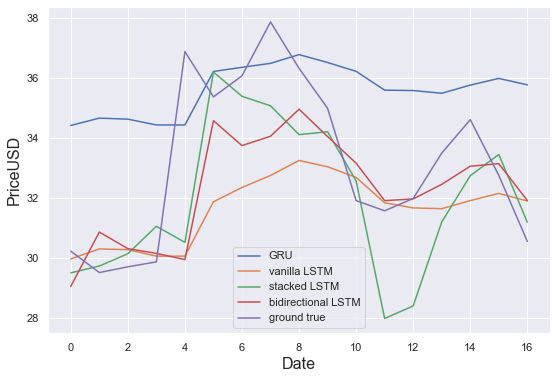

In [37]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.plot(predict_GRU, label='GRU')
plt.plot(predict_stacked, label='vanilla LSTM')
plt.plot(predict_vanilla, label='stacked LSTM')
plt.plot(predict_bidirectional, label='bidirectional LSTM')
plt.plot(test_y, label='ground true')
plt.legend()
plt.ylabel('PriceUSD', size = 16)
plt.xlabel('Date', size = 16)
plt.show()

# 2. Log_difference Method

## 2.1 Preprocessing

### a. Stationary Test

In [38]:
#creating a function to plot the graph and show the test result:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize, color='teal')
    ax1.set_title('UNI Token Price')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2, color='teal');
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3, method='ols', color='teal');
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4, color='teal')
    ax4.set_title('Price Distribution')

    plt.tight_layout()
    
    print('Dickey-Fuller test results:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Statistical Test','P-Value','Used Lags','Observations Number'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Values (%s)"%key] = value.round(4)
        
    print(adftest)

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from math import sqrt

Dickey-Fuller test results:
Statistical Test          -0.1516
P-Value                    0.9441
Used Lags                  1.0000
Observations Number      217.0000
Critical Values (1%)      -3.4608
Critical Values (5%)      -2.8750
Critical Values (10%)     -2.5739
dtype: float64


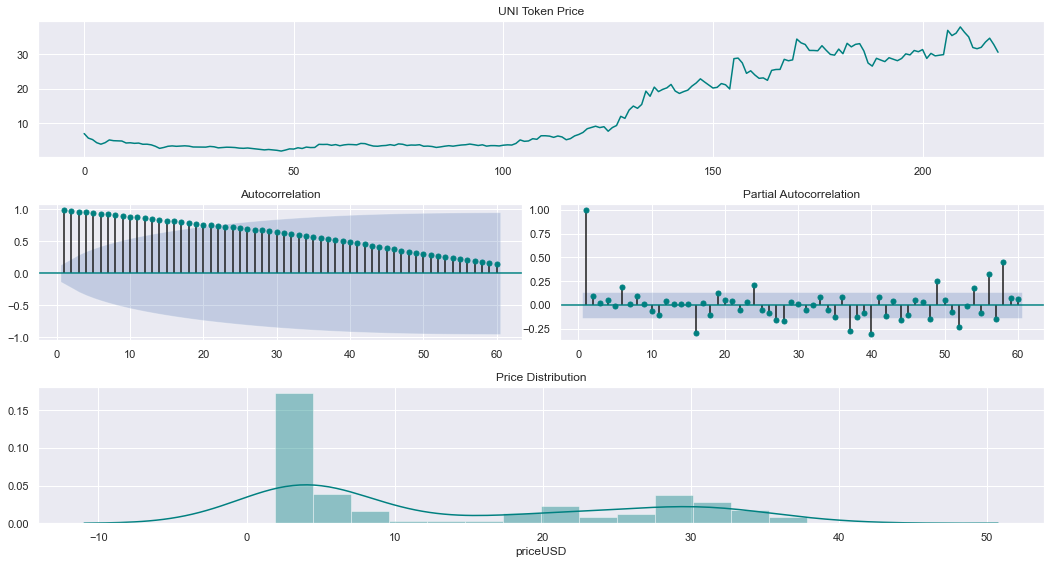

In [40]:
# Before log_diff
check_stationarity(df2['priceUSD'], lags_plots=60)

Dickey-Fuller test results:
Statistical Test         -15.1790
P-Value                    0.0000
Used Lags                  0.0000
Observations Number      217.0000
Critical Values (1%)      -3.4608
Critical Values (5%)      -2.8750
Critical Values (10%)     -2.5739
dtype: float64


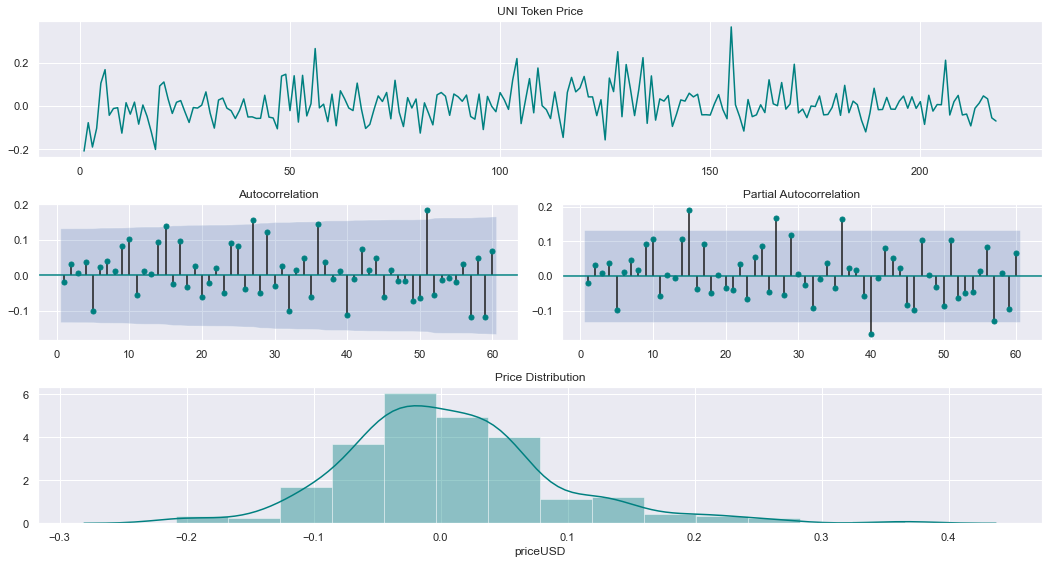

In [41]:
# After log_diff
check_stationarity(np.log(df2['priceUSD']).diff().dropna(), lags_plots=60)

### b. Data transformation

In [42]:
df3 = df1['priceUSD']
data_set1 = df3.values
data_set1 = data_set1.astype('float32')

In [43]:
data_set = df2
data_set = data_set.astype('float32')
dataset_origin=df2
dataset_origin=np.log(dataset_origin)

data_set=pd.DataFrame(np.log(data_set).diff().dropna())
data_set=data_set.values
dataset_origin=dataset_origin.values

In [44]:
ratio = 0.9
train_size = int(len(dataset_origin) * ratio)
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]
train_origin, test_origin = dataset_origin[0:train_size,:], dataset_origin[train_size:len(dataset_origin),:]

In [45]:
def create_dataset(data):
    window = 5
    label_index = 2
    x, y = [], []
    for i in range(len(data) - window):
        x.append(data[i:(i + window), :])
        y.append(data[i + window, label_index])
    return np.array(x), np.array(y)

In [46]:
train_x,train_y=create_dataset(train)
test_x,test_y=create_dataset(test)
test_x_origin,test_y_origin=create_dataset(test_origin)

## 2.2 Modelling (Bidirectional LSTM)

In [47]:
#Bidirectional LSTM
from keras.layers import Dense, LSTM,Dropout, GRU, Bidirectional
model_biLSTM = Sequential()
model_biLSTM.add(Bidirectional(LSTM(100, activation='sigmoid'), input_shape=(train_x.shape[1], train_x.shape[2])))
model_biLSTM.add(Dropout(0.3))
#model_biLSTM.add(Bidirectional(LSTM(100, activation='sigmoid'), input_shape=(train_x.shape[1], train_x.shape[2])))
model_biLSTM.add(Dense(1))
model_biLSTM.compile(optimizer=keras.optimizers.Adam(lr = 0.1), loss='mse')
model_biLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 200)               84800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 85,001
Trainable params: 85,001
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model_biLSTM.fit(train_x, train_y, validation_data=(test_x, test_y),epochs=300, batch_size=64, verbose=2)

Epoch 1/300
3/3 - 1s - loss: 104.1886 - val_loss: 1.1506
Epoch 2/300
3/3 - 0s - loss: 0.6916 - val_loss: 2.1496
Epoch 3/300
3/3 - 0s - loss: 2.4737 - val_loss: 2.4409
Epoch 4/300
3/3 - 0s - loss: 2.3466 - val_loss: 1.3186
Epoch 5/300
3/3 - 0s - loss: 0.9082 - val_loss: 0.1358
Epoch 6/300
3/3 - 0s - loss: 0.3272 - val_loss: 0.9039
Epoch 7/300
3/3 - 0s - loss: 0.5675 - val_loss: 0.1081
Epoch 8/300
3/3 - 0s - loss: 0.0937 - val_loss: 0.1340
Epoch 9/300
3/3 - 0s - loss: 0.1392 - val_loss: 0.1308
Epoch 10/300
3/3 - 0s - loss: 0.1307 - val_loss: 0.1578
Epoch 11/300
3/3 - 0s - loss: 0.0937 - val_loss: 0.2160
Epoch 12/300
3/3 - 0s - loss: 0.0756 - val_loss: 0.1840
Epoch 13/300
3/3 - 0s - loss: 0.0469 - val_loss: 0.0571
Epoch 14/300
3/3 - 0s - loss: 0.0237 - val_loss: 0.0217
Epoch 15/300
3/3 - 0s - loss: 0.0174 - val_loss: 0.0139
Epoch 16/300
3/3 - 0s - loss: 0.0186 - val_loss: 0.0102
Epoch 17/300
3/3 - 0s - loss: 0.0159 - val_loss: 0.0087
Epoch 18/300
3/3 - 0s - loss: 0.0135 - val_loss: 0.0081

## 2.3 Evaluation

### a. Loss function

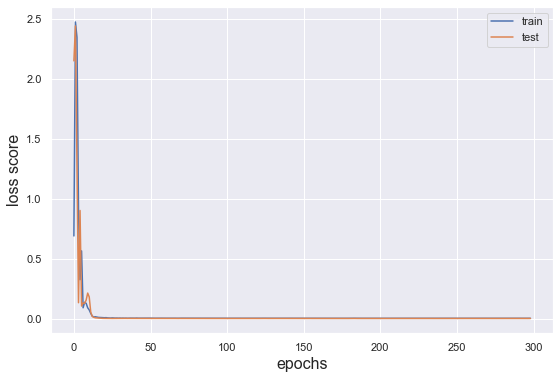

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context("talk")
sns.set(rc={'figure.figsize':(9,6)}) 

plt.ylabel('loss score', size = 16)
plt.xlabel('epochs', size = 16)

plt.plot(history.history['loss'][1:], label='train')
plt.plot(history.history['val_loss'][1:], label='test')

plt.legend(loc='upper right')

plt.show()

### b. Predicted delta price vs. true delta price plot

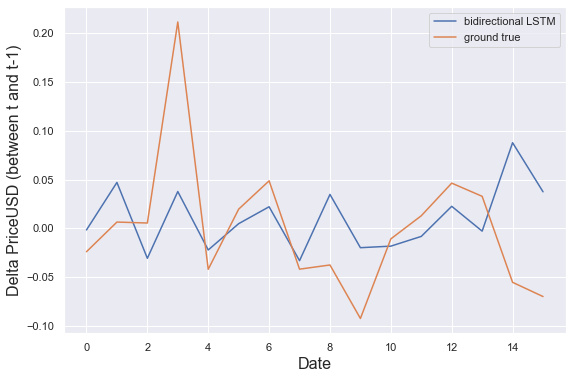

In [50]:
predict_y_bi = model_biLSTM.predict(test_x)
plt.plot(predict_y_bi, label='bidirectional LSTM')
plt.plot(test_y, label='ground true')
plt.legend()
plt.ylabel('Delta PriceUSD (between t and t-1)', size = 16)
plt.xlabel('Date', size = 16)
plt.show()

### c. RMSE (transform delta price to price)

In [53]:
#transform test y
test_y_origin = pd.DataFrame(test_y_origin)
test_y_origin = test_y_origin[:-1]
test_y = pd.DataFrame(test_y)
test_y1 = test_y+test_y_origin
test_y1 = np.exp(test_y1)

In [54]:
#transform predicted y
predict_y_bi = model_biLSTM.predict(test_x)
predict_y_bi = pd.DataFrame(predict_y_bi)
predict_y_bi_value = predict_y_bi+test_y_origin
predict_y_bi_value = np.exp(predict_y_bi_value)

In [55]:
#RMSE calculation
print("Bidirectional LSTM RMSE:",np.sqrt(mean_squared_error(test_y1,predict_y_bi_value)))

Bidirectional LSTM RMSE: 2.3992573719569417


### d. Predicted price vs. test price plot

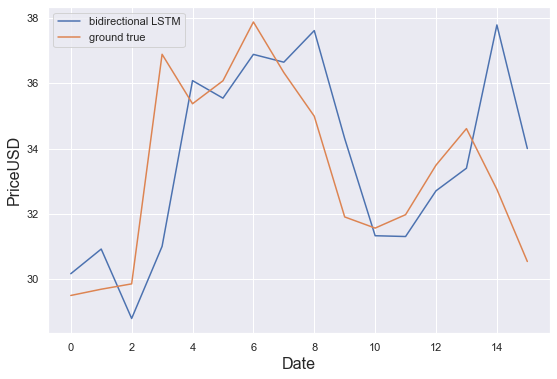

In [56]:
plt.plot(predict_y_bi_value, label='bidirectional LSTM')
plt.plot(test_y1, label='ground true')
plt.legend()
plt.ylabel('PriceUSD', size = 16)
plt.xlabel('Date', size = 16)
plt.show()